# **Projet final Datascience**

#### **1 - Import des différentes bibliothèques**

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### **2 - Présentation du jeu de données et des différentes valeurs**

**Lecture du fichier CSV**

In [68]:
df = pd.read_csv('car_data.csv')

**2.1 - Analyse de surface du dataset :** 
- Shape
- Colonnes
- Nombre de données nulles

In [69]:
print("Voici la shape du dataframe : " +  str(df.shape))
print("Les différentes colonnes du dataset sont : " +",".join(df.columns))
print(df.isnull().sum())

Voici la shape du dataframe : (301, 9)
Les différentes colonnes du dataset sont : Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


**2.2 - Visualisation des 5 premières lignes du dataset**

In [70]:
print(df.head(5))

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


**2.3 - Présentation des colonnes avec des valeurs numériques**

In [71]:
df[['Selling_Price','Present_Price','Kms_Driven']].describe()

,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980
std,5.082812,8.644115,38886.883882
min,0.100000,0.320000,500.000000
25%,0.900000,1.200000,15000.000000
50%,3.600000,6.400000,32000.000000
75%,6.000000,9.900000,48767.000000
max,35.000000,92.600000,500000.000000


#### **3 - Préparation et nettoyage des données**

**3.1 - Suppression de colonnes :**
- "Car_Name" est une colonne inutile pour prédire le prix d'une fonction en fonction des différentes features

In [72]:
df = df.drop('Car_Name',axis=1)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**3.2 - Visualisation des données catégorielles**

In [73]:
print(df['Fuel_Type'].value_counts())
print("\n")
print(df['Seller_Type'].value_counts())
print("\n")
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**3.3 - Suppression des données qui ne sont pas exploitable**
- Nous allons supprimer les deux lignes qui correspondent à CNG dans Fuel_Type

In [74]:
lineToDrop = df[df['Fuel_Type'] == 'CNG'].index
df = df.drop(lineToDrop)

**3.4 - Changements dans le dataset :** 
- Ajout de la colonne age pour la simplicité de compréhension de la vieillesse d'une voiture
- Suppression de la colonne Year qui ne sert plus à rien

In [75]:
maxAge = df['Year'].max()
df['carAge'] = (maxAge+ 1) - df['Year']

#### **4 - Visualisation des données**
- Visualisation des différentes Features en fonction du prix de vente

In [76]:
# Ajustement de valeurs pour les rendre plus lisible
df['Kms_Driven'] = df['Kms_Driven'] / 1000

**4.1 - Utilisation des scatter plots**
- Relation entre deux variables
- Identification des outliers 
- Comprendre la distribution des données

C:\Users\valen\AppData\Local\Temp\ipykernel_10388\2893624991.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


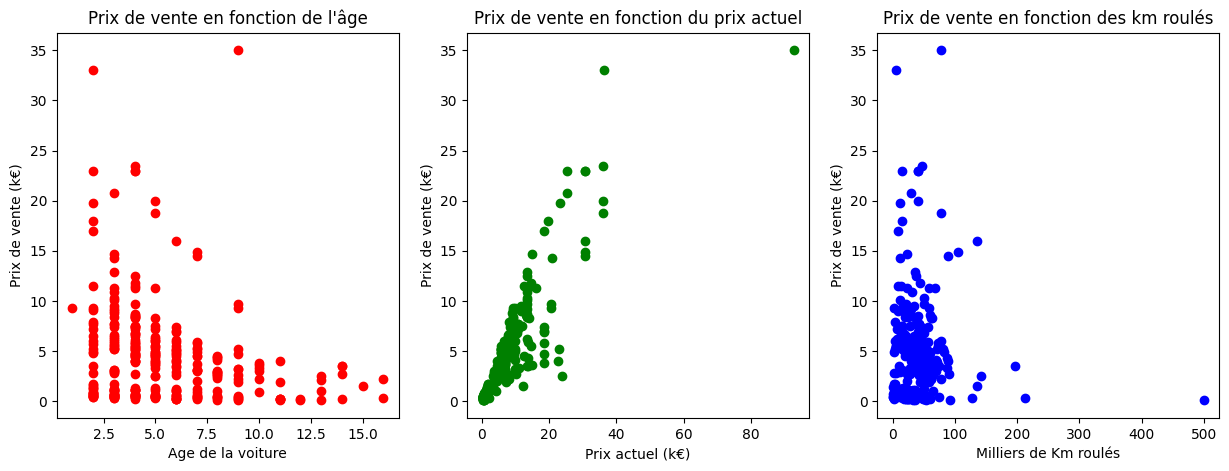

In [77]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))

# Figure 1
axes[0].scatter(df['carAge'],df['Selling_Price'], color='r')
axes[0].set_title('Prix de vente en fonction de l\'âge')
axes[0].set_xlabel('Age de la voiture')
axes[0].set_ylabel('Prix de vente (k€)')

# Figure 2 
axes[1].scatter(df['Present_Price'],df['Selling_Price'], color='g')
axes[1].set_title('Prix de vente en fonction du prix actuel')
axes[1].set_xlabel('Prix actuel (k€)')
axes[1].set_ylabel('Prix de vente (k€)')

# Figure 3
axes[2].scatter(df['Kms_Driven'],df['Selling_Price'],color='b')
axes[2].set_title('Prix de vente en fonction des km roulés')
axes[2].set_xlabel('Milliers de Km roulés')
axes[2].set_ylabel('Prix de vente (k€)')

fig.show()

**4.2 - Analyse des boxplot pour enlever les outliers**
- Résumé visuel de la distribution
- Identification des outliers
- Symétrie et forme de la distribution

![](boxplot1.png)


Médiane du prix actuel (k€): 6.4
Max du prix actuel (k€): 92.6
Min du prix actuel (k€): 0.32


Médiane des km roulés (k€): 32.0
Max des km roulés (k€): 500.0
Min des km roulés (k€): 0.5


C:\Users\valen\AppData\Local\Temp\ipykernel_10388\1925926920.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


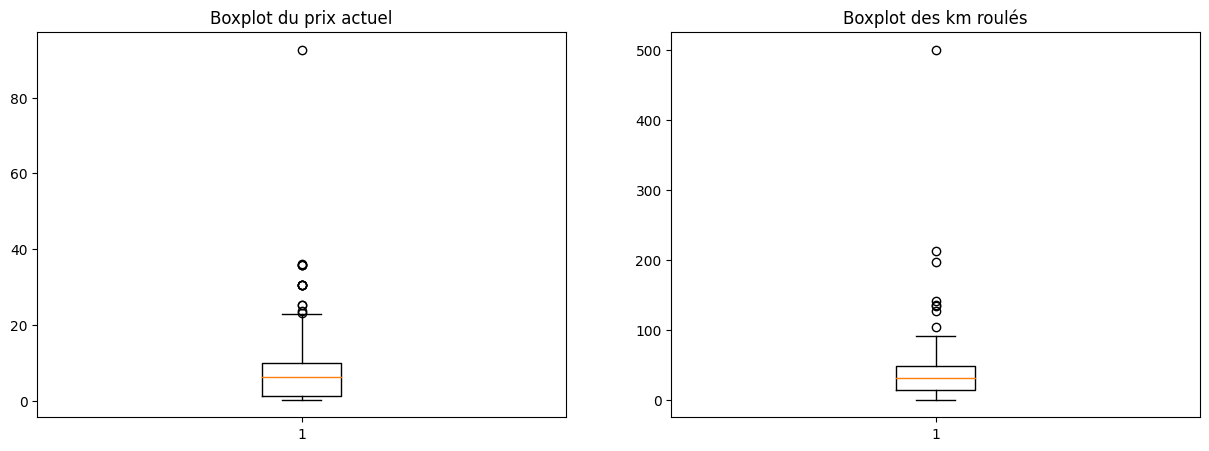

In [78]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
 
# Fig 1 
axes[0].boxplot(df['Present_Price'])
axes[0].set_title('Boxplot du prix actuel')

# Fig 2
axes[1].boxplot(df['Kms_Driven'])
axes[1].set_title('Boxplot des km roulés')

fig.show()

print("Médiane du prix actuel (k€): " + str(df['Present_Price'].median()))
print("Max du prix actuel (k€): " + str(df['Present_Price'].max()))
print("Min du prix actuel (k€): " + str(df['Present_Price'].min()))

print('\n')

print("Médiane des km roulés (k€): " + str(df['Kms_Driven'].median()))
print("Max des km roulés (k€): " + str(df['Kms_Driven'].max()))
print("Min des km roulés (k€): " + str(df['Kms_Driven'].min()))


#### **5 - Post Visualisation (Ajustement des données)**

**Outliers**
- Calculer les quartiles et écart interquartile
- Etablir les seuils pour l'élimination des outliers
- Suppression des outliers

**Pourquoi supprime t-on les outliers ?**
- Eviter d'émettre des hypothèses erronées
- Mauvaise généralisation du/des modèles aux nouvelles données
- Rends le modèle moins robuste et plus sujet aux erreurs de prédictions

In [79]:
# ==================================Prix actuel 

q1PresentPrice = np.percentile(df['Present_Price'],25)
q3PresentPrice = np.percentile(df['Present_Price'],75)

# Calcul de l'espace inter-quartile
iqrPresentPrice = q3PresentPrice - q1PresentPrice

# Plage de la borne IQR
borneInfPresentPrice = q1PresentPrice - 1.5 * iqrPresentPrice
bornSupPresentPrice = q3PresentPrice + 1.5 * iqrPresentPrice

# Filtrer les indices des données qui sont en dehors de la plage interquartile
indexSupprimer = df[(df['Present_Price'] < borneInfPresentPrice) | (df['Present_Price'] > bornSupPresentPrice)].index

print("Shape avant : " + str(df.shape))
df = df.drop(indexSupprimer)

# Affichage des données des index qui vont être supprimés
print("Index des données à supprimer : " + str(indexSupprimer))
print("Shape après :" + str(df.shape))


Shape avant : (299, 9)
Index des données à supprimer : Index([50, 51, 53, 59, 62, 63, 64, 66, 79, 82, 85, 86, 93, 96], dtype='int64')
Shape après :(285, 9)


In [80]:
# ==================================Km roulés 

q1KmDriven = np.percentile(df['Kms_Driven'],25)
q3KmDriven = np.percentile(df['Kms_Driven'],75)

# Calcul de l'espace inter-quartile
iqrKmDriven = q3KmDriven - q1KmDriven

# Plage de la borne IQR
borneInfKmDriven = q1KmDriven - 1.5 * iqrKmDriven
bornSupKmDriven = q3KmDriven + 1.5 * iqrKmDriven

# Filtrer les indices des données qui sont en dehors de la plage interquartile
indexSupprimerKm = df[(df['Kms_Driven'] < borneInfKmDriven) | (df['Kms_Driven'] > bornSupKmDriven)].index

print("Shape avant : " + str(df.shape))
df = df.drop(indexSupprimerKm)

# Affichage des données des index qui vont être supprimés
print("Index des données à supprimer : " + str(indexSupprimerKm))
print("Shape après :" + str(df.shape))


Shape avant : (285, 9)
Index des données à supprimer : Index([37, 77, 84, 179, 196], dtype='int64')
Shape après :(280, 9)


#### **6 - Visualisation après ajustement des données**

C:\Users\valen\AppData\Local\Temp\ipykernel_10388\2068268727.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


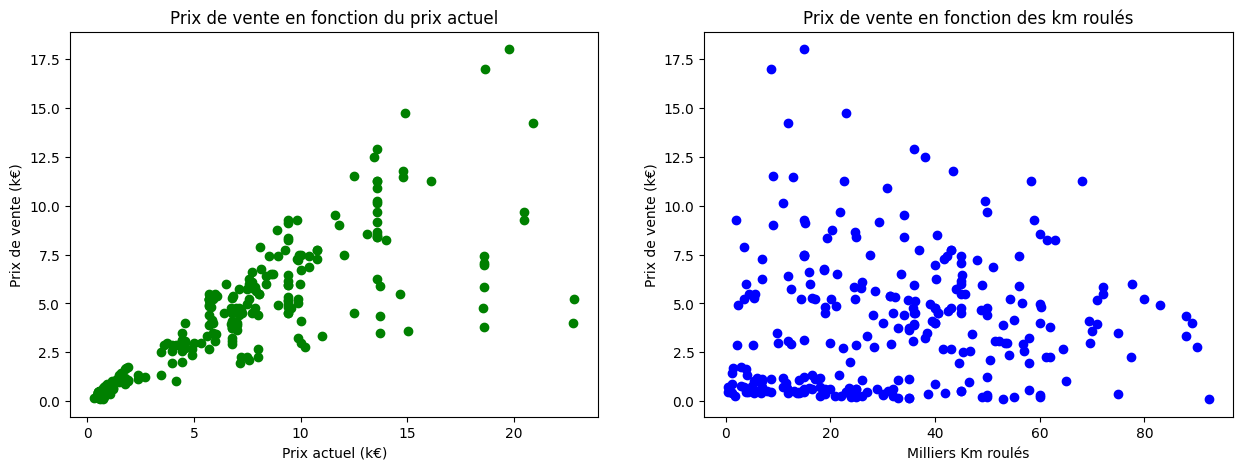

In [81]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Figure 2 
axes[0].scatter(df['Present_Price'],df['Selling_Price'], color='g')
axes[0].set_title('Prix de vente en fonction du prix actuel')
axes[0].set_xlabel('Prix actuel (k€)')
axes[0].set_ylabel('Prix de vente (k€)')

# Figure 3
axes[1].scatter(df['Kms_Driven'],df['Selling_Price'],color='b')
axes[1].set_title('Prix de vente en fonction des km roulés')
axes[1].set_xlabel('Milliers Km roulés')
axes[1].set_ylabel('Prix de vente (k€)')

fig.show()

Médiane du prix actuel (k€): 5.9
Max du prix actuel (k€): 22.83
Min du prix actuel (k€): 0.32


Médiane des km roulés (k€): 30.3765
Max des km roulés (k€): 92.233
Min des km roulés (k€): 0.5


C:\Users\valen\AppData\Local\Temp\ipykernel_10388\3110130169.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


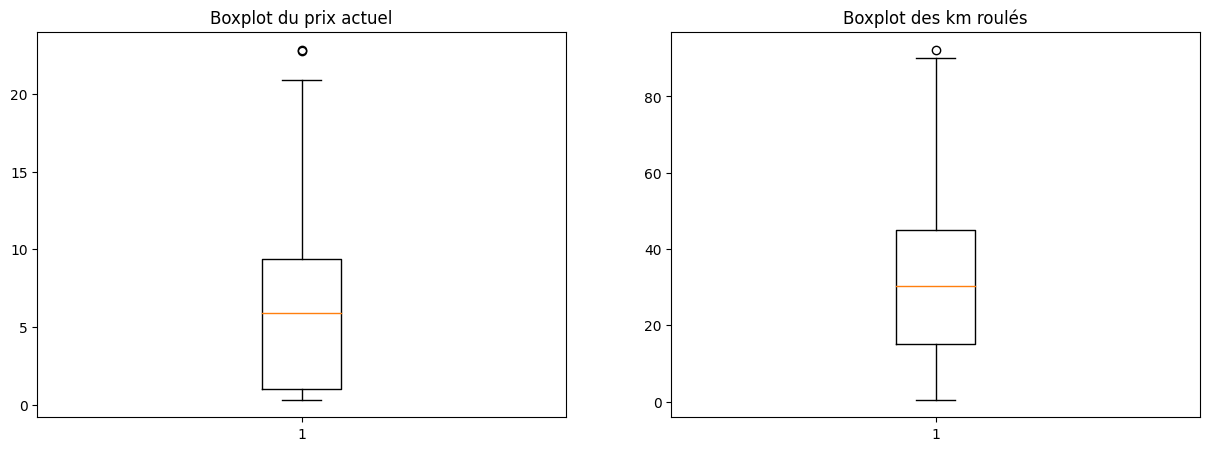

In [82]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
 
# Fig 1 
axes[0].boxplot(df['Present_Price'])
axes[0].set_title('Boxplot du prix actuel')

# Fig 2
axes[1].boxplot(df['Kms_Driven'])
axes[1].set_title('Boxplot des km roulés')

fig.show()

print("Médiane du prix actuel (k€): " + str(df['Present_Price'].median()))
print("Max du prix actuel (k€): " + str(df['Present_Price'].max()))
print("Min du prix actuel (k€): " + str(df['Present_Price'].min()))

print("\n")

print("Médiane des km roulés (k€): " + str(df['Kms_Driven'].median()))
print("Max des km roulés (k€): " + str(df['Kms_Driven'].max()))
print("Min des km roulés (k€): " + str(df['Kms_Driven'].min()))

In [83]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,carAge
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,2013.760714,3.940679,6.308071,32.169907,0.035714,5.239286
std,2.708653,3.380806,5.193315,21.134526,0.185909,2.708653
min,2003.000000,0.100000,0.320000,0.500000,0.000000,1.000000
25%,2012.000000,0.772500,1.035000,15.000000,0.000000,3.000000
50%,2014.000000,3.500000,5.900000,30.376500,0.000000,5.000000
75%,2016.000000,5.812500,9.400000,45.128500,0.000000,7.000000
max,2018.000000,18.000000,22.830000,92.233000,1.000000,16.000000


#### **7 - Utilisation de Machine Learning**

Utilisation de scikit Learn 

##### **7.1 - Import des différents élément de scikit-Learn**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

##### **7.2 - Séparation des données en train/Test**

In [85]:
# Séparation données / objectif
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'carAge']]
y = df['Selling_Price']

# Création d'un test & training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### **7.3 - Instanciation du modèle**

In [86]:
# model = Ridge(alpha=0.5) # mse == 3.17
# model = Lasso(alpha=0.1) # mse == 3.08
model = LinearRegression() # mse == 3.05

# Entrainement du modèle
model.fit(X_train_scaled, y_train)

# Demander une prediction au modèle
predictions = model.predict(X_test_scaled)

# Evaluation du modèle via mse
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.1780110876086396


##### **7.4 - Prédiction**

In [87]:
pred_list = list(predictions)
y_test_list = list(y_test)

# comparaison des prix side/side
for i in range(len(pred_list[:10])):
    print(f"Prediction:{round(pred_list[i],2)}, actuel: {y_test_list[i]}")

Prediction:4.98, actuel: 5.5
Prediction:1.72, actuel: 0.75
Prediction:4.93, actuel: 5.5
Prediction:4.44, actuel: 5.25
Prediction:1.93, actuel: 0.4
Prediction:5.86, actuel: 7.45
Prediction:1.66, actuel: 0.45
Prediction:5.64, actuel: 5.11
Prediction:-0.34, actuel: 0.45
Prediction:0.85, actuel: 0.38
